In [ ]:
from fastparquet import ParquetFile
from pathlib import Path
import pandas as pd

root_dir = Path("/media/rczx/Dataset/RefCOCO")
split = "val"
pf_files = str(root_dir / "data" / f"{split}-*.parquet")
pf = ParquetFile(pf_files)
df = pf.to_pandas()
print(len(df))
df.head()

8811


,question_id,question,answer,segmentation,bbox,iscrowd,file_name,image.bytes,image.path
0,1537681,Please carefully observe the area circled in t...,"[bowl behind the others can only see part, Dis...","[468.3, 2.83, 471.18, 46.01, 473.1, 83.44, 521...","[468.3, 0.91, 171.7, 116.12]",0,COCO_train2014_000000580957_4.jpg,b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x01...,COCO_train2014_000000580957.jpg
1,710706,Please carefully observe the area circled in t...,"[front bowl w/carrots in it, bowl of carrots, ...","[175.05, 207.75, 213.52, 170.24, 263.53, 152.9...","[151.96, 139.46, 454.93, 283.73]",0,COCO_train2014_000000580957_2.jpg,b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x01...,COCO_train2014_000000580957.jpg
2,480908,Please carefully observe the area circled in t...,"[little girl, pink, Your monitor's color's off...","[131.87, 384.8, 125.38, 372.91, 117.82, 359.94...","[117.82, 300.49, 175.1, 180.51]",0,COCO_train2014_000000580905_2.jpg,b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x01...,COCO_train2014_000000580905.jpg
3,469475,Please carefully observe the area circled in t...,"[green woman, person holding umbrella, woman]","[305.89, 114.58, 340.48, 139.44, 367.51, 148.0...","[289.68, 110.25, 290.76, 365.35]",0,COCO_train2014_000000580905_1.jpg,b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x01...,COCO_train2014_000000580905.jpg
4,1746473,Please carefully observe the area circled in t...,"[mom, adult, lady sitting]","[248.1, 594.17, 186.47, 608.4, 161.19, 608.4, ...","[151.7, 173.83, 218.08, 434.57]",0,COCO_train2014_000000580785_3.jpg,b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x01...,COCO_train2014_000000580785.jpg


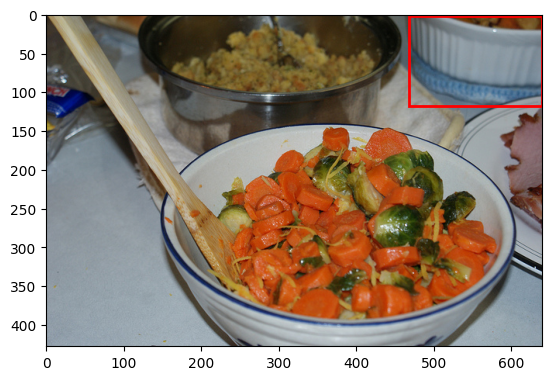

In [ ]:
from PIL import Image
from matplotlib import pyplot as plt
import io

first = df.iloc[0]
segmentation = first["segmentation"]
bbox = first["bbox"]
img = Image.open(io.BytesIO(first["image.bytes"]))
plt.imshow(img)
import matplotlib.patches as patches

ax = plt.gca()
x, y, w, h = bbox
rect = patches.Rectangle((x, y), w, h, linewidth=2, edgecolor="r", facecolor="none")
ax.add_patch(rect)
plt.show()

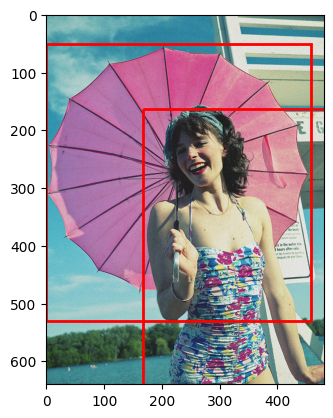

In [ ]:
from datasets import load_dataset
from PIL import Image
import io

ds = load_dataset("detection-datasets/coco", cache_dir="data")
train_ds = ds["train"]
i = 4
df = train_ds[i]
image = df["image"]
# image = Image.open(io.BytesIO(image))
for bbox in df["objects"]["bbox"]:
    x, y, w, h = bbox
    rect = patches.Rectangle((x, y), w, h, linewidth=2, edgecolor="r", facecolor="none")
    ax = plt.gca()
    ax.add_patch(rect)
plt.imshow(image)
plt.show()

In [ ]:
train_file = "data/coco2017/annotations/instances_train2017.json"
import json

with open(train_file, "r") as f:
    data = json.load(f)

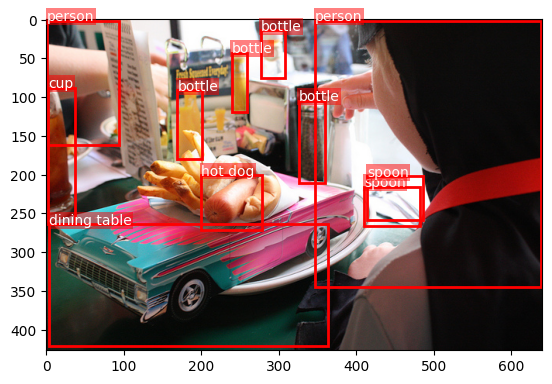

image_id=558840 的检测实例数量：11


In [ ]:
from pprint import pp
from PIL import Image
import io
import matplotlib.patches as patches
import matplotlib.pyplot as plt

# 在COCO数据集中，一张图片通常对应多个检测实例（即有多个目标/物体），
# 每个实例会有一条annotation，且通过'image_id'关联。
i = 0
image_id = data["annotations"][i]["image_id"]

# 对应图片所有annotation
anns = [ann for ann in data["annotations"] if ann["image_id"] == image_id]

# 加载类别id到类别名的映射
category_id_to_name = {cat["id"]: cat["name"] for cat in data["categories"]}

image_file = f"data/coco2017/train2017/{image_id:012d}.jpg"
image = Image.open(image_file)

plt.imshow(image)
ax = plt.gca()

for ann in anns:
    bbox = ann["bbox"]
    cat_id = ann["category_id"]
    cat_name = category_id_to_name.get(cat_id, str(cat_id))
    rect = patches.Rectangle(
        (bbox[0], bbox[1]),
        bbox[2],
        bbox[3],
        linewidth=2,
        edgecolor="r",
        facecolor="none",
    )
    ax.add_patch(rect)
    # 在bbox左上角加标签
    ax.text(
        bbox[0],
        bbox[1],
        cat_name,
        fontsize=10,
        color="white",
        bbox=dict(facecolor="red", alpha=0.5, edgecolor="none", pad=1),
    )

plt.show()

# （可选）输出该图片有多少检测实例
print(f"image_id={image_id} 的检测实例数量：{len(anns)}")

In [1]:
import json
import pandas as pd
from pathlib import Path
from collections import defaultdict

# 定义要处理的splits
splits = ["train", "valid", "test"]

# COCO数据集split映射（test通常使用val的标注）
split_mapping = {
    "train": "train",
    "val": "val",
    "valid": "val",
    "test": "val",  # COCO没有公开test标注，使用val代替
}

# 数据输出目录（与后续数据加载保持一致）
output_dir = Path("data/coco2017")
output_dir.mkdir(parents=True, exist_ok=True)
annotations_dir = output_dir / "annotations"

# 处理每个split
for split in splits:
    # 确定annotation文件名
    coco_split = split_mapping.get(split, split)
    if coco_split == "test":
        coco_split = "val"  # test使用val的标注

    ann_file = annotations_dir / f"instances_{coco_split}2017.json"

    if not ann_file.exists():
        print(f"警告: {ann_file} 不存在，跳过 {split}")
        continue

    print(f"\n处理 {split} 数据集...")

    # 加载annotation文件
    with open(ann_file, "r", encoding="utf-8") as f:
        data = json.load(f)

    # 创建类别id到类别名的映射
    category_id_to_name = {cat["id"]: cat["name"] for cat in data["categories"]}

    # 按image_id组织annotations
    image_annotations = defaultdict(list)
    for ann in data["annotations"]:
        image_id = ann["image_id"]
        bbox = ann["bbox"]  # [x, y, width, height]
        category_id = ann["category_id"]
        category_name = category_id_to_name[category_id]

        image_annotations[image_id].append(
            {"bbox": bbox, "label": category_name, "category_id": category_id}
        )

    # 构建bbox_list，包含图片信息
    bbox_list = []
    for image_id, anns in image_annotations.items():
        # 找到对应的图片信息
        image_info = next(
            (img for img in data["images"] if img["id"] == image_id), None
        )
        if image_info is None:
            continue

        image_entry = {
            "image_id": image_id,
            "file_name": image_info["file_name"],
            "width": image_info["width"],
            "height": image_info["height"],
            "bboxes": [ann["bbox"] for ann in anns],
            "labels": [ann["label"] for ann in anns],
            "category_ids": [ann["category_id"] for ann in anns],
            "num_objects": len(anns),
        }
        bbox_list.append(image_entry)

    # 保存为json文件
    output_json = output_dir / f"bbox_list_{split}.json"
    with open(output_json, "w", encoding="utf-8") as f:
        json.dump(bbox_list, f, indent=2, ensure_ascii=False)

    print(f"已保存 {len(bbox_list)} 条图片信息到 {output_json}")


处理 train 数据集...
已保存 117266 条图片信息到 data/coco2017/bbox_list_train.json

处理 valid 数据集...
已保存 4952 条图片信息到 data/coco2017/bbox_list_valid.json

处理 test 数据集...
已保存 4952 条图片信息到 data/coco2017/bbox_list_test.json


In [2]:
# 为每个split生成CSV和Parquet文件
splits = ["train", "valid", "test"]
output_dir = Path("data/coco2017")

for split in splits:
    json_file = output_dir / f"bbox_list_{split}.json"

    if not json_file.exists():
        print(f"警告: {json_file} 不存在，跳过 {split}")
        continue

    print(f"\n处理 {split} 的 CSV 和 Parquet 文件...")

    # 读取json文件
    with open(json_file, "r", encoding="utf-8") as f:
        bbox_list = json.load(f)

    # 按照要求：每行代表一个image，bboxes为list
    rows = []
    for img_entry in bbox_list:
        row = {
            "image_id": img_entry["image_id"],
            "file_name": img_entry["file_name"],
            "width": img_entry["width"],
            "height": img_entry["height"],
            "bboxes": img_entry["bboxes"],
            "labels": img_entry["labels"],
            "category_ids": img_entry["category_ids"],
            "num_objects": img_entry["num_objects"],
        }
        rows.append(row)

    # 创建DataFrame
    df_bbox = pd.DataFrame(rows)

    # 保存为CSV（注意：列表会被序列化为字符串，仅用于快速查看）
    csv_file = output_dir / f"bbox_list_{split}.csv"
    df_bbox.to_csv(csv_file, index=False, encoding="utf-8")
    print(f"已保存 {len(df_bbox)} 行数据到 {csv_file}")

    # 保存为Parquet（推荐用于后续代码加载，能够保留list结构）
    parquet_file = output_dir / f"bbox_list_{split}.parquet"
    df_bbox.to_parquet(parquet_file, index=False)
    print(f"已保存 {len(df_bbox)} 行数据到 {parquet_file}")

    # 显示前几行
    print(f"\n{split} 前3行数据:")
    print(df_bbox.head(3))


处理 train 的 CSV 和 Parquet 文件...
已保存 117266 行数据到 data/coco2017/bbox_list_train.csv
已保存 117266 行数据到 data/coco2017/bbox_list_train.parquet

train 前3行数据:
   image_id         file_name  width  height  \
0    558840  000000558840.jpg    640     427   
1    200365  000000200365.jpg    640     480   
2    495357  000000495357.jpg    640     479   

                                              bboxes  \
0  [[199.84, 200.46, 77.71, 70.88], [325.27, 104....   
1  [[234.22, 317.11, 149.39, 38.55], [239.48, 347...   
2  [[337.02, 244.46, 66.47, 66.75], [255.84, 257....   

                                              labels  \
0  [hot dog, bottle, bottle, cup, person, bottle,...   
1  [hot dog, hot dog, hot dog, hot dog, dining ta...   
2  [dog, motorcycle, handbag, handbag, handbag, p...   

                                        category_ids  num_objects  
0         [58, 44, 44, 47, 1, 44, 50, 1, 44, 67, 50]           11  
1                  [58, 58, 58, 58, 67, 2, 3, 3, 47]            9  
2  

In [ ]:
from pathlib import Path
import json
import pandas as pd

# 生成 bbox_list.csv，列为: image_id, image_path, image.bytes, bboxes (JSON字符串，元素含 class_id 与 bbox[xywh])
workspace_root = Path("/home/rczx/workspace/sxy/lab/NeuroTrain")


def resolve_image_path(file_name):
    if not file_name:
        return None
    candidates = [
        workspace_root / "data" / "coco2017" / "train2017" / file_name,
        workspace_root / "data" / "coco2017" / "val2017" / file_name,
        workspace_root / "data" / "coco" / "train2017" / file_name,
        workspace_root / "data" / "coco" / "val2017" / file_name,
    ]
    for p in candidates:
        if p.exists():
            return str(p.relative_to(workspace_root))
    return None


def to_bbox_objects(entry):
    bboxes = entry.get("bboxes") or entry.get("bbox") or []
    category_ids = entry.get("category_ids") or entry.get("categories") or []
    objs = []
    if category_ids and len(category_ids) == len(bboxes):
        for cid, bb in zip(category_ids, bboxes):
            # 目标格式: {"class_id": int, "bbox": [x, y, w, h]}
            objs.append({"class_id": int(cid), "bbox": bb})
    else:
        for bb in bboxes:
            objs.append({"class_id": -1, "bbox": bb})
    return objs


def load_bbox_jsons():
    paths = [
        workspace_root / "bbox_list_train.json",
        workspace_root / "bbox_list_valid.json",
        workspace_root / "bbox_list_test.json",
    ]
    records = []
    any_found = False
    for p in paths:
        if p.exists():
            any_found = True
            with open(p, "r", encoding="utf-8") as f:
                records.extend(json.load(f))
    if not any_found:
        fallback = workspace_root / "bbox_list.json"
        if fallback.exists():
            with open(fallback, "r", encoding="utf-8") as f:
                records = json.load(f)
    return records


records = load_bbox_jsons()
rows = []
for rec in records:
    image_id = rec.get("image_id")
    file_name = rec.get("file_name") or (
        f"{int(image_id):012d}.jpg" if image_id is not None else None
    )
    image_path = resolve_image_path(file_name) if file_name else None

    image_bytes = None
    if image_path:
        img_fp = workspace_root / image_path
        try:
            with open(img_fp, "rb") as imgf:
                image_bytes = imgf.read()
        except Exception:
            image_bytes = None

    bbox_objs = to_bbox_objects(rec)

    rows.append(
        {
            "image_id": image_id,
            "image_path": image_path,
            "image.bytes": image_bytes,
            "bboxes": json.dumps(bbox_objs, ensure_ascii=False),
        }
    )

# DataFrame并保存
df_out = pd.DataFrame(rows)
df_out = df_out[["image_id", "image_path", "image.bytes", "bboxes"]]
csv_out = workspace_root / "bbox_list.csv"
df_out.to_csv(csv_out, index=False)
print(f"Wrote {len(df_out)} rows to {csv_out}")